In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
from matplotlib import pyplot as plt

In [2]:
# Open the file
df = pd.read_csv ('creditscores_dataset.csv')

# Data Exploratory

In [3]:
df.head()

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
0,1,Low,No dependent,Very low,Very low,Married,Positive
1,2,Low,No dependent,Very low,Very low,Single,Positive
2,1,Low,No dependent,Very low,Very low,Single,Positive
3,3,Low,No dependent,Very low,Very low,Married,Positive
4,3,Low,No dependent,Very low,Very low,Single,Negative


In [4]:
df.tail()

,Years of Education after High School,Requested Credit Amount,Number of Dependents,Monthly Income,Monthly Expense,Marital Status,Credit Rating
8076,3,Low,Less than 2,Very High,Very high,Married,Positive
8077,3,Medium,Less than 2,Very High,Very high,Married,Negative
8078,3,Medium,More than 2,Very High,Very high,Married,Positive
8079,7,Medium,Less than 2,Very High,Very high,Married,Positive
8080,3,Medium,Less than 2,Very High,Very high,Married,Positive


In [5]:
df.describe()

,Years of Education after High School
count,8081.000000
mean,2.608588
std,1.571835
min,0.000000
25%,1.000000
50%,3.000000
75%,3.000000
max,7.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Years of Education after High School  8081 non-null   int64 
 1   Requested Credit Amount               8081 non-null   object
 2   Number of Dependents                  8081 non-null   object
 3   Monthly Income                        8081 non-null   object
 4   Monthly Expense                       8081 non-null   object
 5   Marital Status                        8081 non-null   object
 6   Credit Rating                         8081 non-null   object
dtypes: int64(1), object(6)
memory usage: 442.1+ KB


Create Dummy Variables

In [7]:
# Change Credit Rating to 1 and 0
df['Credit Rating'][df['Credit Rating'] == 'Positive'] = 1
df['Credit Rating'][df['Credit Rating'] == 'Negative'] = 0

# Create Dummy Variables for Req. Credit Amount
dummy1 = pd.get_dummies(df['Requested Credit Amount']).rename(columns =
                            {"High": "High Credit Amt", "Medium": "Medium Credit Amt", "Low": "Low Credit Amt"})
df = pd.concat([df,dummy1],axis = 1)

# Create Dummy Variables for Marital Status
dummy2 = pd.get_dummies(df['Marital Status']).rename(columns =
                            {"Not specified": "Marriage Not Specified"})
df = pd.concat([df,dummy2],axis = 1)

# Create Dummy Variables for Number of Dependents
dummy3 = pd.get_dummies(df['Number of Dependents']).rename(columns =
                            {"More than 2": "More than two dependents", "Less than 2": "Less than two dependents",
                            "No dependent": "No dependent"})
df = pd.concat([df,dummy3],axis = 1)

# Create Dummy Variables for Monthly Income
dummy4 = pd.get_dummies(df['Monthly Income']).rename(columns =
                            {"Very High": "Very High Monthly Income", "High": "High Monthly Income",
                            "Moderate": "Moderate Monthly Income", "Low": "Low Monthly Income",
                            "Very low": "Very Low Monthly Income"})
df = pd.concat([df,dummy4],axis = 1)

# Create Dummy Variables for Monthly Expense
dummy5 = pd.get_dummies(df['Monthly Expense']).rename(columns =
                            {"Very high": "Very High Monthly Expense", "High": "High Monthly Expense",
                            "Moderate": "Moderate Monthly Expense", "Low": "Low Monthly Expense",
                            "Very low": "Very Low Monthly Expense"})
df = pd.concat([df,dummy5],axis = 1)

/var/folders/3d/vjnlw6gj0vs9bchhz783z9_80000gn/T/ipykernel_1719/1787410959.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit Rating'][df['Credit Rating'] == 'Positive'] = 1
/var/folders/3d/vjnlw6gj0vs9bchhz783z9_80000gn/T/ipykernel_1719/1787410959.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Credit Rating'][df['Credit Rating'] == 'Negative'] = 0


In [8]:
df.drop(columns = ["Requested Credit Amount"], inplace = True)
df.drop(columns = ["Marital Status"], inplace = True)
df.drop(columns = ["Number of Dependents"], inplace = True)
df.drop(columns = ["Monthly Income"], inplace = True)
df.drop(columns = ["Monthly Expense"], inplace = True)

In [9]:
df.head()

,Years of Education after High School,Credit Rating,High Credit Amt,Low Credit Amt,Medium Credit Amt,Married,Marriage Not Specified,Single,Less than two dependents,More than two dependents,...,High Monthly Income,Low Monthly Income,Moderate Monthly Income,Very High Monthly Income,Very Low Monthly Income,High Monthly Expense,Low Monthly Expense,Moderate Monthly Expense,Very High Monthly Expense,Very Low Monthly Expense
0,1,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,1,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,3,1,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [10]:
df.tail()

,Years of Education after High School,Credit Rating,High Credit Amt,Low Credit Amt,Medium Credit Amt,Married,Marriage Not Specified,Single,Less than two dependents,More than two dependents,...,High Monthly Income,Low Monthly Income,Moderate Monthly Income,Very High Monthly Income,Very Low Monthly Income,High Monthly Expense,Low Monthly Expense,Moderate Monthly Expense,Very High Monthly Expense,Very Low Monthly Expense
8076,3,1,0,1,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
8077,3,0,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
8078,3,1,0,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
8079,7,1,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
8080,3,1,0,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Years of Education after High School  8081 non-null   int64 
 1   Credit Rating                         8081 non-null   object
 2   High Credit Amt                       8081 non-null   uint8 
 3   Low Credit Amt                        8081 non-null   uint8 
 4   Medium Credit Amt                     8081 non-null   uint8 
 5   Married                               8081 non-null   uint8 
 6   Marriage Not Specified                8081 non-null   uint8 
 7   Single                                8081 non-null   uint8 
 8   Less than two dependents              8081 non-null   uint8 
 9   More than two dependents              8081 non-null   uint8 
 10  No dependent                          8081 non-null   uint8 
 11  High Monthly Income           

<AxesSubplot:>

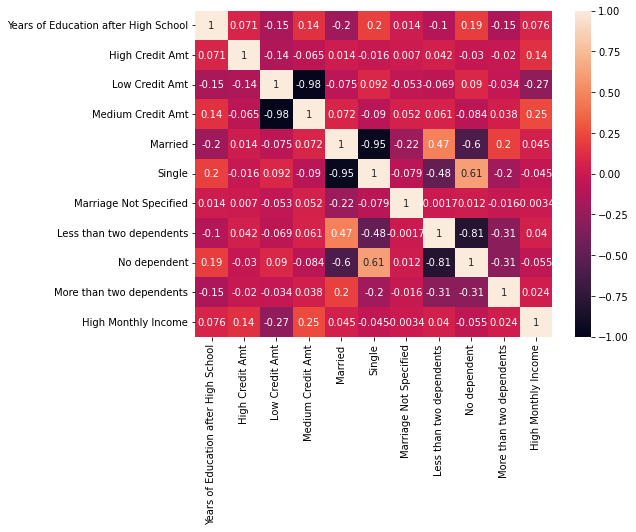

In [12]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df[["Credit Rating",
                "Years of Education after High School",
                "High Credit Amt", 
                "Low Credit Amt", 
                "Medium Credit Amt",
                "Married",
                "Single", 
                "Marriage Not Specified", 
                "Less than two dependents", 
                "No dependent",
                "More than two dependents",
                "High Monthly Income",]].corr(),vmin=-1,vmax=1, annot=True)

<AxesSubplot:>

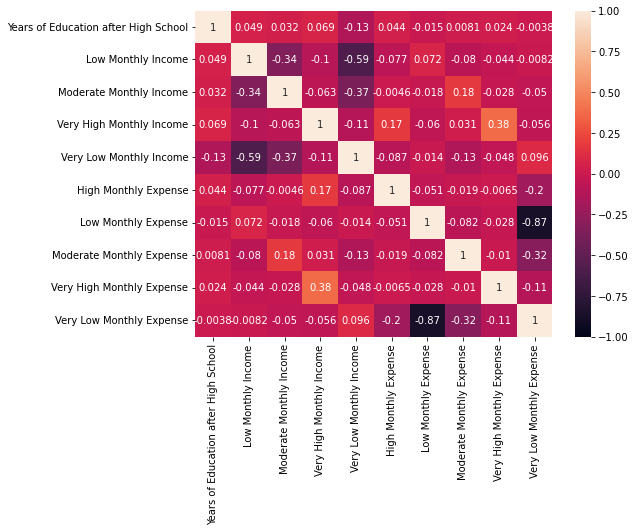

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[["Credit Rating",
                "Years of Education after High School",
                "Low Monthly Income", 
                "Moderate Monthly Income", 
                "Very High Monthly Income",
                "Very Low Monthly Income", 
                "High Monthly Expense",
                "Low Monthly Expense", 
                "Moderate Monthly Expense",
                "Very High Monthly Expense",
                "Very Low Monthly Expense",]].corr(),vmin=-1,vmax=1, annot=True)

# Logistic Regression

Test Logistic Regression Without Updated Thresholds

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, plot_roc_curve, plot_precision_recall_curve, plot_confusion_matrix

In [15]:
y = df["Credit Rating"]
x = df[["Years of Education after High School",
        "High Credit Amt", 
        "Low Credit Amt", 
        "Medium Credit Amt",
        "Married",
        "Single", 
        "Marriage Not Specified", 
        "Less than two dependents", 
        "No dependent",
        "More than two dependents",
        "High Monthly Income",
        "Low Monthly Income", 
        "Moderate Monthly Income", 
        "Very High Monthly Income",
        "Very Low Monthly Income", 
        "High Monthly Expense",
        "Low Monthly Expense", 
        "Moderate Monthly Expense",
        "Very High Monthly Expense",
        "Very Low Monthly Expense"]]

In [16]:
y = y.astype('int')
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [17]:
x_test

,Years of Education after High School,High Credit Amt,Low Credit Amt,Medium Credit Amt,Married,Single,Marriage Not Specified,Less than two dependents,No dependent,More than two dependents,High Monthly Income,Low Monthly Income,Moderate Monthly Income,Very High Monthly Income,Very Low Monthly Income,High Monthly Expense,Low Monthly Expense,Moderate Monthly Expense,Very High Monthly Expense,Very Low Monthly Expense
3367,3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1
1146,3,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4741,3,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
2872,2,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
6539,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6246,5,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0
6105,4,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4902,3,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4512,3,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1


In [18]:
x_train.shape

(5656, 20)

In [19]:
x_test.shape

(2425, 20)

In [20]:
y_train.shape

(5656,)

In [21]:
y_test.shape

(2425,)

In [22]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_test

3367    1
1146    1
4741    0
2872    1
6539    1
       ..
6246    0
6105    0
4902    1
4512    1
7490    1
Name: Credit Rating, Length: 2425, dtype: int64

In [43]:
df.columns

Index(['Years of Education after High School', 'Credit Rating',
       'High Credit Amt', 'Low Credit Amt', 'Medium Credit Amt', 'Married',
       'Marriage Not Specified', 'Single', 'Less than two dependents',
       'More than two dependents', 'No dependent', 'High Monthly Income',
       'Low Monthly Income', 'Moderate Monthly Income',
       'Very High Monthly Income', 'Very Low Monthly Income',
       'High Monthly Expense', 'Low Monthly Expense',
       'Moderate Monthly Expense', 'Very High Monthly Expense',
       'Very Low Monthly Expense'],
      dtype='object')

In [24]:
print(log_reg.coef_)

[[ 0.06974361  0.50899689 -0.14994159 -0.36153077 -0.0827802   0.13178954
  -0.0514848   0.03047803 -0.11206033  0.07910684 -0.02221649 -0.22121007
  -0.16741099  0.39063612  0.01772598  0.38932061  0.21148693 -0.11085365
  -0.65182688  0.15939753]]


In [25]:
print(log_reg.intercept_)

[1.81858469]


In [26]:
y_pred = log_reg.predict_proba(x_test)
y_pred

array([[0.13754989, 0.86245011],
       [0.11892023, 0.88107977],
       [0.13972712, 0.86027288],
       ...,
       [0.167149  , 0.832851  ],
       [0.19629216, 0.80370784],
       [0.14853914, 0.85146086]])

In [27]:
true_values = y
predictions = log_reg.predict(x)
f1_score(true_values,predictions,average='weighted')

0.7926903296715324

In [28]:
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [29]:
# Constructing the Lasso model
# l1 indicates lasso
model_lasso = LogisticRegression(penalty = 'l1',random_state=0,max_iter = 1000, solver = 'liblinear').fit(x,y)
true_values_lasso = y
lasso = model_lasso.predict(x)
lasso_f1score = f1_score(true_values_lasso,lasso,average='weighted')
lasso_f1score

0.7926903296715324

In [30]:
# Constructing Elastic Net Regression
model_elasticnet = LogisticRegression(l1_ratio = 0.5, penalty = 'elasticnet',
                                      random_state=0,max_iter = 1000,solver = 'saga').fit(x,y)
true_values_elasticnet = y
elasticnet = model_elasticnet.predict(x)
elasticnet_f1score = f1_score(true_values_elasticnet,elasticnet,average='weighted')
elasticnet_f1score

0.7926903296715324

<AxesSubplot:>

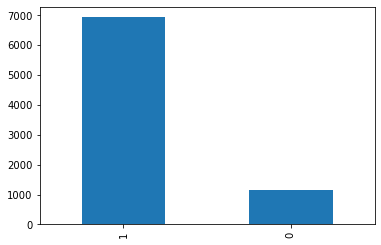

In [31]:
df['Credit Rating'].value_counts().plot(kind='bar')

# There are 7 declined applications and 5 approved applications

Text(33.0, 0.5, 'True Values')

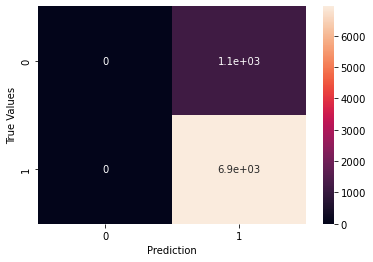

In [32]:
#plot confusion matrix
sns.heatmap(confusion_matrix(true_values, predictions), annot=True)
plt.xlabel('Prediction')
plt.ylabel('True Values')

In [48]:
tn, fp, fn, tp = confusion_matrix(true_values, predictions).ravel()
print(tn,fp,fn,tp)

0 1146 0 6935


In [52]:
print (precision_score(true_values,predictions))
print (recall_score(true_values,predictions))

0.858185868085633
1.0


In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

y_score1 = log_reg.predict_proba(x_test)[:,1]
y_score2 = model_lasso.predict_proba(x_test)[:,1]
y_score3 = model_elasticnet.predict_proba(x_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(y_test, y_score3)

print('Roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score1))
print('Roc_auc_score for Lasso Regression: ', roc_auc_score(y_test, y_score2))
print('Roc_auc_score for Net Elastic Regression: ', roc_auc_score(y_test, y_score3))

Roc_auc_score for Logistic Regression:  0.5296560161820423
Roc_auc_score for Lasso Regression:  0.5616594095632176
Roc_auc_score for Net Elastic Regression:  0.5595515312055448


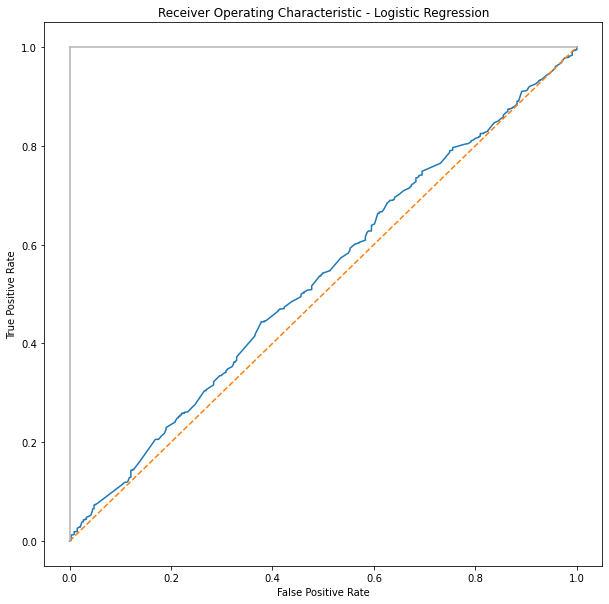

In [34]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic Regression')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

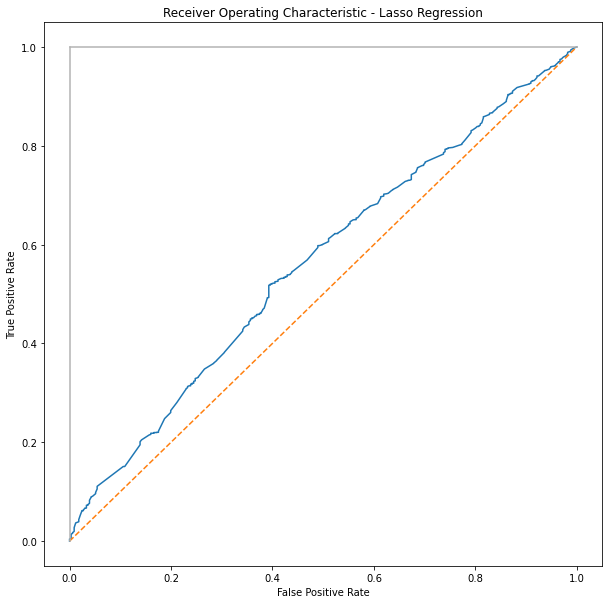

In [35]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Lasso Regression')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

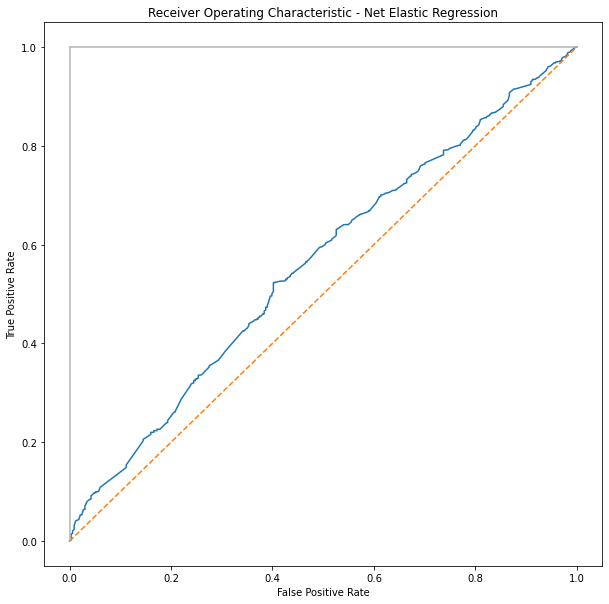

In [36]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Net Elastic Regression')
plt.plot(false_positive_rate3, true_positive_rate3)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Updated Logistic Regression with Thresholds (Credit Approval System)

Logistic Regression

In [37]:
approved = 0
declined = 0

for i in range(len(x_test)):
    if df["High Credit Amt"].values[i] == 1:
        log_reg = LogisticRegression()
        log_reg.fit(x_train, y_train)
        y_pred = (log_reg.predict_proba(x_test))
        #print ("high")
        #print (log_reg.predict_proba(x_test)[i])
        if (y_pred[i][1:2]) >= 0.2:
            approved += 1
        else:
            declined += 1        
    elif df["Medium Credit Amt"].values[i] == 1:
        log_reg = LogisticRegression()
        log_reg.fit(x_train, y_train)
        y_pred = (log_reg.predict_proba(x_test))
        #print ("medium")
        #print (log_reg.predict_proba(x_test)[i])
        if (y_pred[i][1:2]) >= 0.5:
            approved += 1
        else:
            declined += 1 
    elif df["Low Credit Amt"].values[i] == 1:
        log_reg = LogisticRegression()
        log_reg.fit(x_train, y_train)
        y_pred = (log_reg.predict_proba(x_test))
        #print ("low")
        #print (log_reg.predict_proba(x_test)[i])
        if (y_pred[i][1:2]) >= 0.8:
            approved += 1
        else:
            declined += 1 
    else:
        print ("Error")

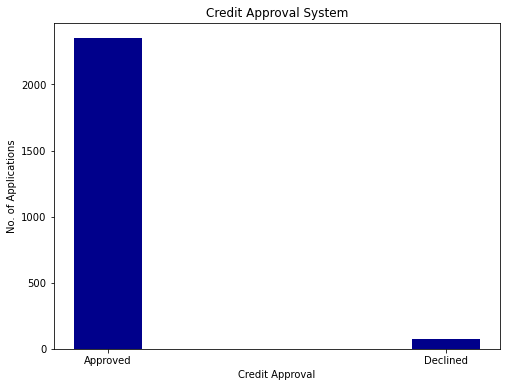

In [38]:
import matplotlib.pyplot as plt
data = {"Approved": approved, "Declined": declined}
title = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (8,6))

plt.bar(title, values, color ='darkblue', width = 0.2)
plt.xlabel("Credit Approval")
plt.ylabel("No. of Applications")
plt.title("Credit Approval System")
plt.show()

Lasso Regression

In [39]:
approved = 0
declined = 0

for i in range(len(x_test)):
    if df["High Credit Amt"].values[i] == 1:
        model_lasso = LogisticRegression(penalty = 'l1',random_state=0,max_iter = 1000, solver = 'liblinear').fit(x,y)
        true_values_lasso = y
        lasso = (model_lasso.predict_proba(x_test))
        #print (model_lasso.predict_proba(x_test)[i])
        if (lasso[i][1:2]) >= 0.2:
            approved += 1
        else:
            declined += 1        
    elif df["Medium Credit Amt"].values[i] == 1:
        model_lasso = LogisticRegression(penalty = 'l1',random_state=0,max_iter = 1000, solver = 'liblinear').fit(x,y)
        true_values_lasso = y
        lasso = (model_lasso.predict_proba(x_test))
        #print (model_lasso.predict_proba(x_test)[i])
        if (lasso[i][1:2]) >= 0.5:
            approved += 1
        else:
            declined += 1    
    elif df["Low Credit Amt"].values[i] == 1:
        model_lasso = LogisticRegression(penalty = 'l1',random_state=0,max_iter = 1000, solver = 'liblinear').fit(x,y)
        true_values_lasso = y
        lasso = (model_lasso.predict_proba(x_test))
        #print (model_lasso.predict_proba(x_test)[i])
        if (lasso[i][1:2]) >= 0.8:
            approved += 1
        else:
            declined += 1    
    else:
        print ("Error")

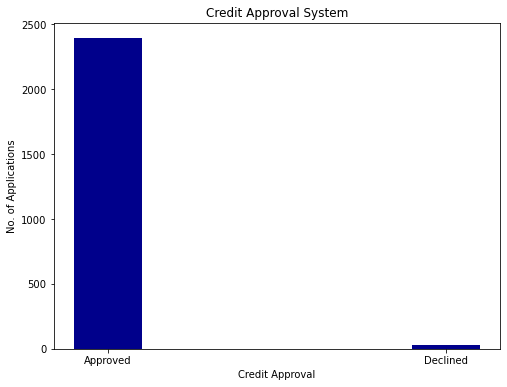

In [40]:
data = {"Approved": approved, "Declined": declined}
title = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (8,6))

plt.bar(title, values, color ='darkblue', width = 0.2)
plt.xlabel("Credit Approval")
plt.ylabel("No. of Applications")
plt.title("Credit Approval System")
plt.show()

Elastic Net Regualization

In [41]:
approved = 0
declined = 0

for i in range(len(x_test)):
    if df["High Credit Amt"].values[i] == 1:
        model_elasticnet = LogisticRegression(l1_ratio = 0.5, penalty = 'elasticnet',
                                      random_state=0,max_iter = 1000,solver = 'saga').fit(x,y)
        true_values_elasticnet = y
        elasticnet = (model_elasticnet.predict_proba(x_test))
        #print (model_elasticnet.predict_proba(x_test)[i])
        if (elasticnet[i][1:2]) >= 0.2:
            approved += 1
        else:
            declined += 1        
    elif df["Medium Credit Amt"].values[i] == 1:
        model_elasticnet = LogisticRegression(l1_ratio = 0.5, penalty = 'elasticnet',
                                      random_state=0,max_iter = 1000,solver = 'saga').fit(x,y)
        true_values_elasticnet = y
        elasticnet = (model_elasticnet.predict_proba(x_test))
        #print (model_elasticnet.predict_proba(x_test)[i])
        if (elasticnet[i][1:2]) >= 0.5:
            approved += 1
        else:
            declined += 1     
    elif df["Low Credit Amt"].values[i] == 1:
        model_elasticnet = LogisticRegression(l1_ratio = 0.5, penalty = 'elasticnet',
                                      random_state=0,max_iter = 1000,solver = 'saga').fit(x,y)
        true_values_elasticnet = y
        elasticnet = (model_elasticnet.predict_proba(x_test))
        #print (model_elasticnet.predict_proba(x_test)[i])
        if (elasticnet[i][1:2]) >= 0.8:
            approved += 1
        else:
            declined += 1     
    else:
        print ("Error")

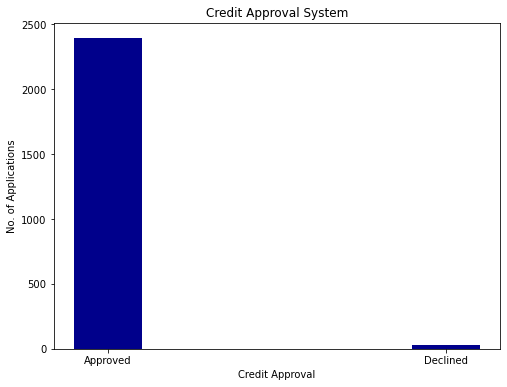

In [42]:
data = {"Approved": approved, "Declined": declined}
title = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (8,6))

plt.bar(title, values, color ='darkblue', width = 0.2)
plt.xlabel("Credit Approval")
plt.ylabel("No. of Applications")
plt.title("Credit Approval System")
plt.show()